# Algerian Forest Fires - Model Training and Evaluation
This notebook includes:
- Feature Engineering
- Correlation analysis
- Model Training using Linear, Lasso, Ridge, ElasticNet Regressions
- Evaluation using MAE and R² Score


In [ ]:
# Install required libraries
!pip install seaborn

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load the cleaned dataset
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

In [ ]:
df.drop(['day','month','year'],axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
# Encode 'Classes' column (Fire = 1, Not Fire = 0)
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [ ]:
# Independent and Dependent Features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [ ]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [ ]:
print(y)

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64


In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182, 11)
(61, 11)
(182,)
(61,)


In [ ]:
# Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


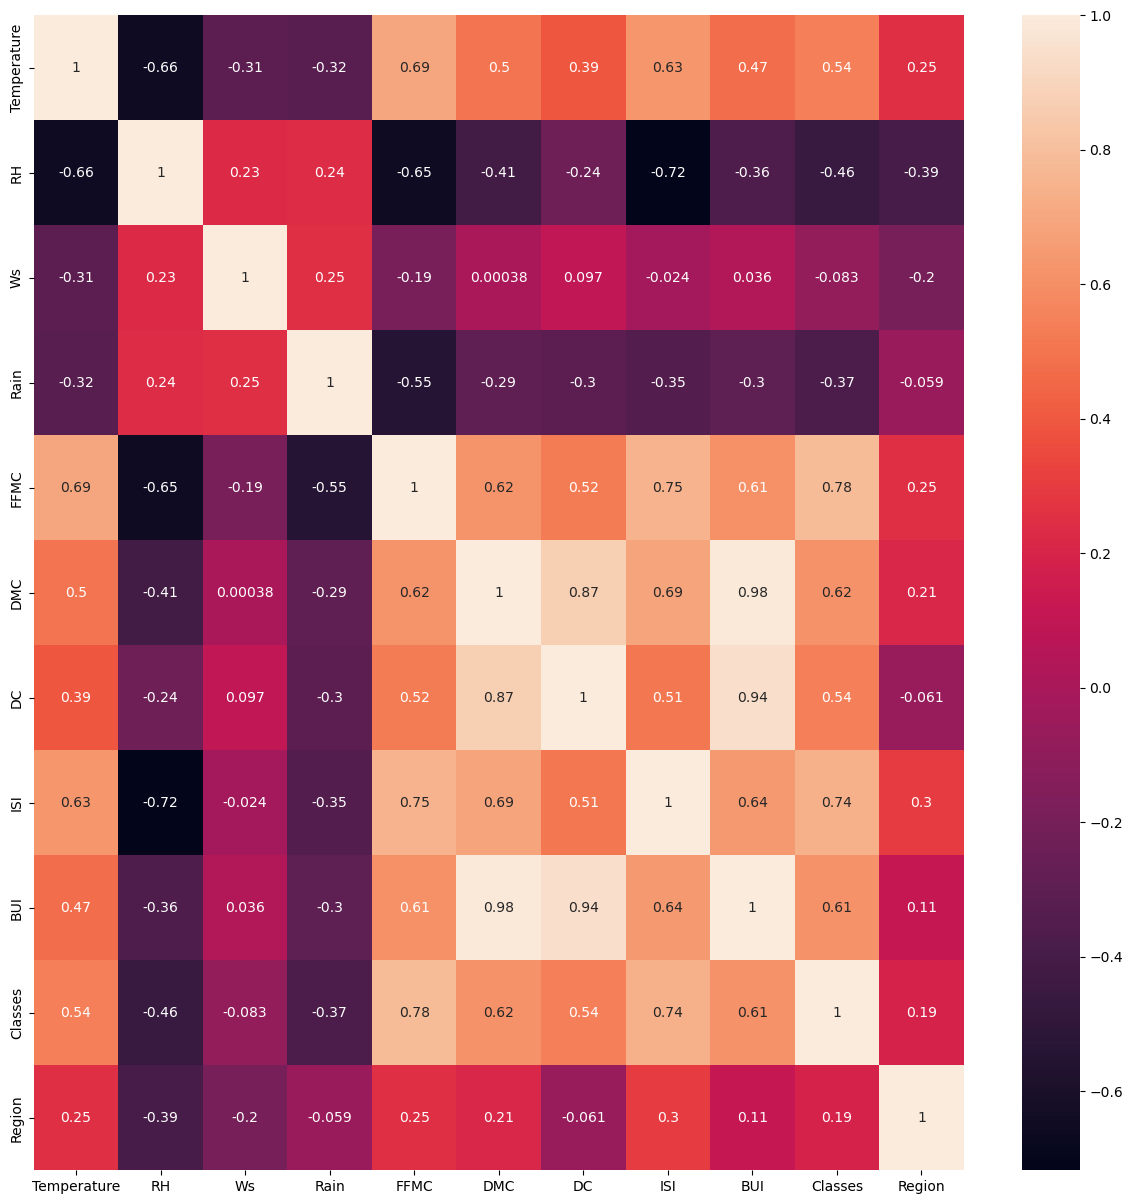

In [ ]:
# Check for multicollinearity 
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr().abs()  # Take absolute value directly

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                print(f"High correlation between '{colname1}' and '{colname2}' -> {corr_matrix.iloc[i,j]:.2f}")
                col_corr.add(colname1)
                
    return col_corr


In [ ]:
# Threshold Value
corr_features=correlation(X_train,0.85)

High correlation between 'DC' and 'DMC' -> 0.87
High correlation between 'BUI' and 'DMC' -> 0.98
High correlation between 'BUI' and 'DC' -> 0.94


In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

### Feature Scaling or Standardization

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'X_train after Scaling')

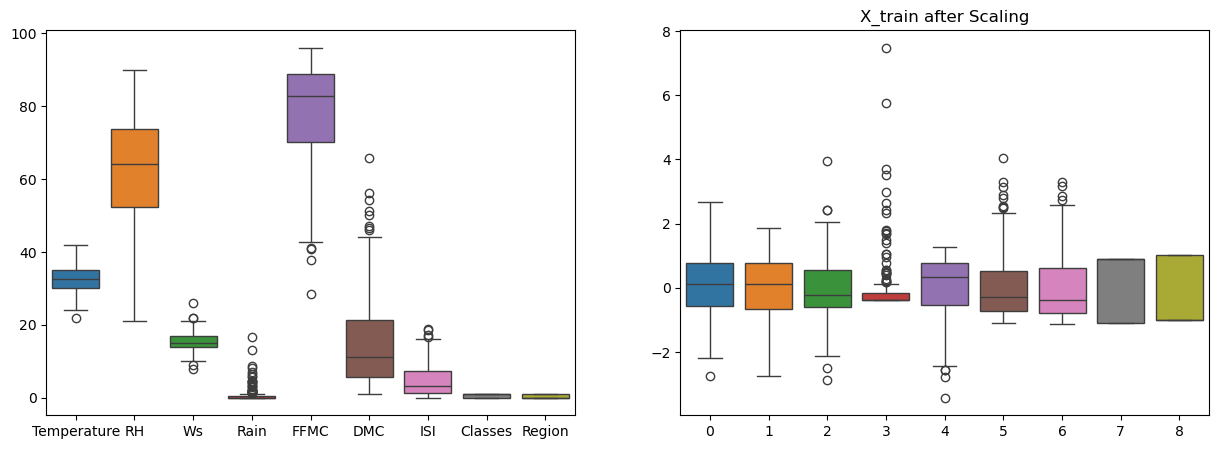

In [ ]:
# Box Plots to understand effect of Standard Scaler
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=X_train,ax=axes[0])
plt.title('X_train before Scaling')
sns.boxplot(data=X_train_scaled,ax=axes[1])
plt.title('X_train after Scaling')

## 📈 Regression Modeling
We will use the following models:
- Linear Regression
- Lasso Regression (+CV)
- Ridge Regression (+CV)
- Elastic Net (+CV)


### 🔹Linear Regression Model

Mean Absolute Error  0.5468236465249977
R2 Score  0.9847657384266952


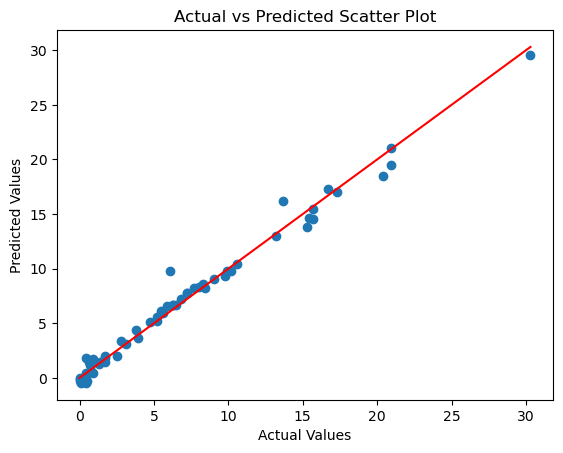

In [ ]:
# Initialize, train, and predict
# Calculate MAE and R²
# Visualize predictions

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

linReg=LinearRegression()
linReg.fit(X_train_scaled,y_train)
y_pred=linReg.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error ",mae)
print("R2 Score ",score)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Scatter Plot')
plt.show()

### 🔹Lasso Regression

Mean Absolute Error  1.1331759949144087
R2 Score  0.9492020263112388


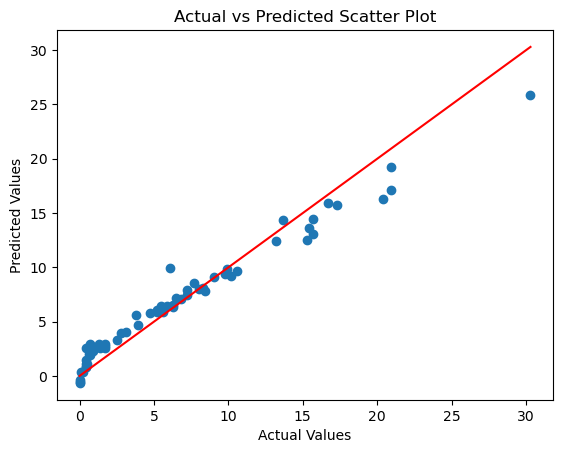

In [ ]:
# Initialize, train, and predict
# Calculate MAE and R²
# Visualize predictions

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error ",mae)
print("R2 Score ",score)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Scatter Plot')
plt.show()

### 🔹Lasso Regression with Cross-Validation

In [ ]:
# Initialize, train, and predict
# Calculate MAE and R²
# Visualize predictions

from sklearn.linear_model import LassoCV
lasso_cv=LassoCV(cv=5)
lasso_cv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [ ]:
lasso_cv.alpha_

0.05725391318234411

In [ ]:
lasso_cv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [ ]:
lasso_cv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

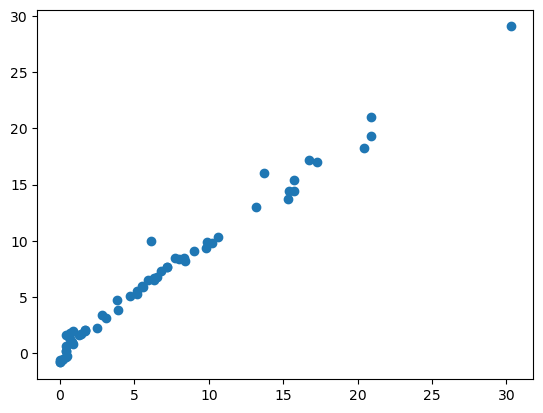

In [ ]:
y_pred=lasso_cv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error ",mae)
print("R2 Score ",score)

Mean Absolute Error  0.6199701158263436
R2 Score  0.9820946715928274


### 🔹Ridge Regression

Mean Absolute Error  0.5642305340105683
R2 Score  0.9842993364555513


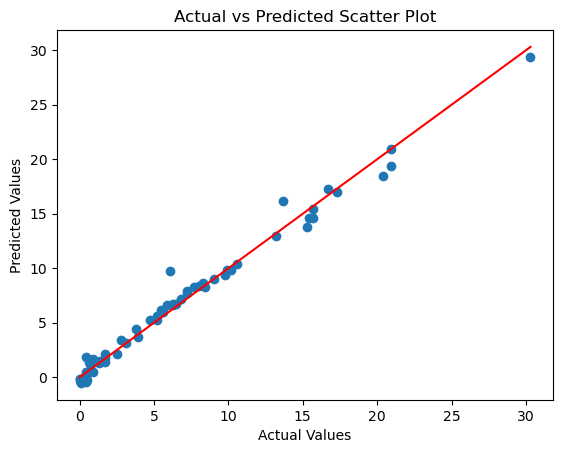

In [ ]:
# Initialize, train, and predict
# Calculate MAE and R²
# Visualize predictions

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error ",mae)
print("R2 Score ",score)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Scatter Plot')
plt.show()

### 🔹Ridge Regression with Cross-Validation

Mean Absolute Error  0.5642305340105683
R2 Score  0.9842993364555513


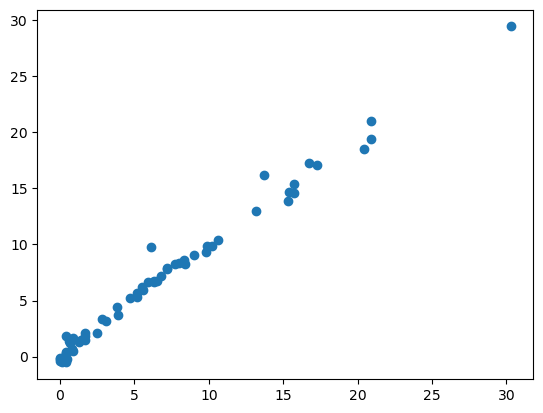

In [ ]:
# Initialize, train, and predict
# Calculate MAE and R²
# Visualize predictions

from sklearn.linear_model import RidgeCV
ridge_cv=RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled,y_train)
y_pred=ridge_cv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error ",mae)
print("R2 Score ",score)

### 🔹Elastic Net

Mean Absolute Error  1.8822353634896
R2 Score  0.8753460589519703


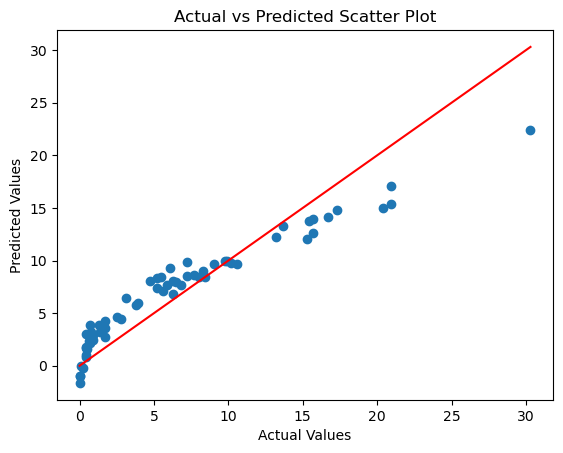

In [ ]:
# Initialize, train, and predict
# Calculate MAE and R²
# Visualize predictions

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error ",mae)
print("R2 Score ",score)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Scatter Plot')
plt.show()

### 🔹Elastic Net Regression with Cross-Validation

Mean Absolute Error  0.6575946731430902
R2 Score  0.9814217587854941


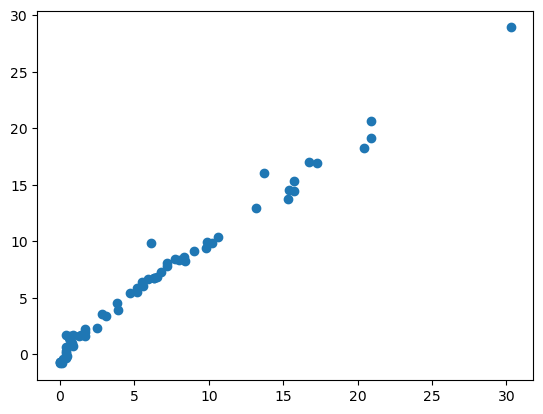

In [ ]:
# Initialize, train, and predict
# Calculate MAE and R²
# Visualize predictions

from sklearn.linear_model import ElasticNetCV
elastic_net_cv=ElasticNetCV(cv=5)
elastic_net_cv.fit(X_train_scaled,y_train)
y_pred=elastic_net_cv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error ",mae)
print("R2 Score ",score)

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

## ✅ Final Model Evaluation Summary

Below is a comparison of the regression models based on **Mean Absolute Error (MAE)** and **R² Score**:

| Model                  | MAE        | R² Score   |
|------------------------|------------|------------|
| Linear Regression      | 0.547      | 0.985      |
| Lasso Regression       | 1.133      | 0.949      |
| LassoCV (Tuned)        | 0.620      | 0.982      |
| Ridge Regression       | 0.564      | 0.984      |
| RidgeCV (Tuned)        | 0.564      | 0.984      |
| Elastic Net            | 1.882      | 0.875      |
| ElasticNetCV (Tuned)   | 0.658      | 0.981      |

### 🔍 Observations:
- **Ridge Regression** still performed best with the **lowest MAE (0.564)** and **highest R² Score (0.984)**.
- **LassoCV**, **RidgeCV**, and **ElasticNetCV** applied **hyperparameter tuning via cross-validation**, but still didn’t surpass Ridge Regression in performance.
- **ElasticNet** showed the weakest results, possibly due to combined regularization not suiting the data distribution.

### 📌 Conclusion:
- **Ridge Regression** remains the most suitable model for this dataset based on both performance and simplicity.
- Since basic models and tuned regularized models have already been tested, **future improvements could involve ensemble models** like **Random Forests** or **Gradient Boosting**.
